In [1]:
import pandas as pd

In [2]:
# cargar dataset
path_clean2_df = "/content/drive/MyDrive/00. Universidad/02. Analisis de Datos/evento evaluativo 4/en_amazon_review.parquet"
df = pd.read_parquet(path_clean2_df, engine="pyarrow")
df.head()

,rating,title,review,clean_title,clean_review,lang_detected,lang_confidence
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...,more like funchuck,gave this to my dad for a gag gift after direc...,en,0.958576
1,5,Inspiring,I hope a lot of people hear this cd. We need m...,inspiring,i hope a lot of people hear this cd we need mo...,en,0.960202
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,the best soundtrack ever to anything,im reading a lot of reviews saying that this i...,en,0.961903
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...,chrono cross ost,the music of yasunori misuda is without questi...,en,0.941064
4,5,Too good to be true,Probably the greatest soundtrack in history! U...,too good to be true,probably the greatest soundtrack in history us...,en,0.989173


In [3]:
# elimina columnas que no necesitas
cols_a_eliminar = ['title','review','lang_detected','lang_confidence']  # reemplaza por tus columnas
df.drop(columns=cols_a_eliminar, inplace=True, errors='ignore')

In [4]:
df.shape

(3629444, 3)

In [5]:
df.describe()

,rating
count,3.629444e+06
mean,2.997965e+00
std,1.413577e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,4.000000e+00
max,5.000000e+00


In [6]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer



##Tokenización

In [7]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
sample_text = df.clean_review.iloc[1]
print("Ejemplo de tokenización:", sample_text)

Ejemplo de tokenización: i hope a lot of people hear this cd we need more strong and positive vibes like this great vocals fresh tunes crosscultural happiness her blues is from the gut the pop sounds are catchy and mature


In [9]:
tokens_nltk = word_tokenize(sample_text, language="english")
senteces_nltk = sent_tokenize(sample_text, language="english")

In [10]:
print("ejemplo: ", senteces_nltk)
print("Tokens: ", tokens_nltk)

ejemplo:  ['i hope a lot of people hear this cd we need more strong and positive vibes like this great vocals fresh tunes crosscultural happiness her blues is from the gut the pop sounds are catchy and mature']
Tokens:  ['i', 'hope', 'a', 'lot', 'of', 'people', 'hear', 'this', 'cd', 'we', 'need', 'more', 'strong', 'and', 'positive', 'vibes', 'like', 'this', 'great', 'vocals', 'fresh', 'tunes', 'crosscultural', 'happiness', 'her', 'blues', 'is', 'from', 'the', 'gut', 'the', 'pop', 'sounds', 'are', 'catchy', 'and', 'mature']


##Stopwords

In [11]:
nltk.download('stopwords')
stopoword_en = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
tokens_no_stop = [word for word in tokens_nltk if word not in stopoword_en]
print("Ejemplo: ", senteces_nltk)
print("Tokens sin Stopwords: ", tokens_no_stop)

Ejemplo:  ['i hope a lot of people hear this cd we need more strong and positive vibes like this great vocals fresh tunes crosscultural happiness her blues is from the gut the pop sounds are catchy and mature']
Tokens sin Stopwords:  ['hope', 'lot', 'people', 'hear', 'cd', 'need', 'strong', 'positive', 'vibes', 'like', 'great', 'vocals', 'fresh', 'tunes', 'crosscultural', 'happiness', 'blues', 'gut', 'pop', 'sounds', 'catchy', 'mature']


##Stemming

In [13]:
stemmer_en = SnowballStemmer("english")

In [14]:
stemmed_tokens = [stemmer_en.stem(token) for token in tokens_no_stop]
print("Tokens sin Stopwords: ", tokens_no_stop)
print("Tokens después de stemming: ", stemmed_tokens)


Tokens sin Stopwords:  ['hope', 'lot', 'people', 'hear', 'cd', 'need', 'strong', 'positive', 'vibes', 'like', 'great', 'vocals', 'fresh', 'tunes', 'crosscultural', 'happiness', 'blues', 'gut', 'pop', 'sounds', 'catchy', 'mature']
Tokens después de stemming:  ['hope', 'lot', 'peopl', 'hear', 'cd', 'need', 'strong', 'posit', 'vibe', 'like', 'great', 'vocal', 'fresh', 'tune', 'crosscultur', 'happi', 'blue', 'gut', 'pop', 'sound', 'catchi', 'matur']


##Lematización


In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [16]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [17]:
# Función auxiliar para mapear etiquetas POS de nltk a las de wordnet

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ  # Adjetivo
    elif tag.startswith('V'):
        return wordnet.VERB  # Verbo
    elif tag.startswith('N'):
        return wordnet.NOUN  # Sustantivo
    elif tag.startswith('R'):
        return wordnet.ADV   # Adverbio
    else:
        return wordnet.NOUN

In [18]:
tagged_tokens = nltk.pos_tag(tokens_no_stop)

lemmatized_tokens = [
    lemmatizer.lemmatize(token, get_wordnet_pos(pos_tag))
    for token, pos_tag in tagged_tokens
]

print("Tokens sin Stopwords:", tokens_no_stop)
print("Tokens después de lematización:", lemmatized_tokens)

Tokens sin Stopwords: ['hope', 'lot', 'people', 'hear', 'cd', 'need', 'strong', 'positive', 'vibes', 'like', 'great', 'vocals', 'fresh', 'tunes', 'crosscultural', 'happiness', 'blues', 'gut', 'pop', 'sounds', 'catchy', 'mature']
Tokens después de lematización: ['hope', 'lot', 'people', 'hear', 'cd', 'need', 'strong', 'positive', 'vibe', 'like', 'great', 'vocal', 'fresh', 'tune', 'crosscultural', 'happiness', 'blue', 'gut', 'pop', 'sound', 'catchy', 'mature']


##Lematización con Spacy

In [19]:
!pip install spacy


In [20]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
import spacy


In [22]:
nlp = spacy.load("en_core_web_sm")


In [23]:

doc = nlp(sample_text)

lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

print("Tokens sin stopwords:", [token.text for token in doc if not token.is_stop and token.is_alpha])
print("Tokens después de lematización:", lemmatized_tokens)



Tokens sin stopwords: ['hope', 'lot', 'people', 'hear', 'cd', 'need', 'strong', 'positive', 'vibes', 'like', 'great', 'vocals', 'fresh', 'tunes', 'crosscultural', 'happiness', 'blues', 'gut', 'pop', 'sounds', 'catchy', 'mature']
Tokens después de lematización: ['hope', 'lot', 'people', 'hear', 'cd', 'need', 'strong', 'positive', 'vibe', 'like', 'great', 'vocal', 'fresh', 'tune', 'crosscultural', 'happiness', 'blue', 'gut', 'pop', 'sound', 'catchy', 'mature']


## Explorando las review

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from collections import Counter, defaultdict
import re

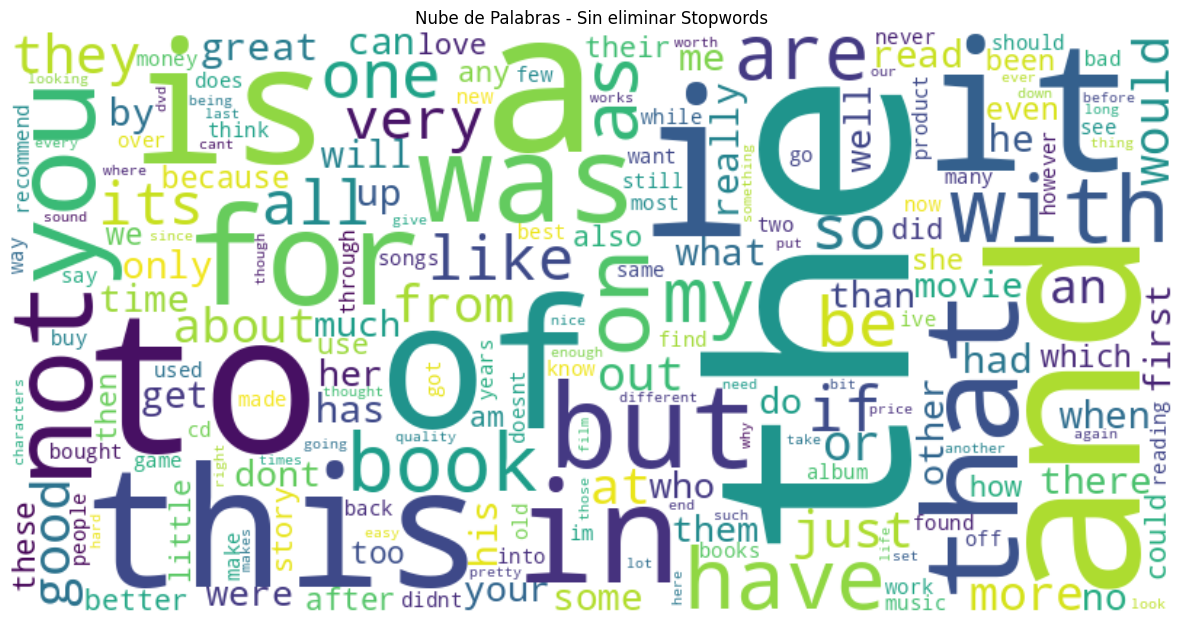

In [25]:


token_re = re.compile(r'\b\w+\b', flags=re.UNICODE)

def tokenize(text):
    return token_re.findall(text.lower())

counter_original = Counter()
for review in df['clean_review'].dropna():
    tokens = tokenize(review)
    counter_original.update(tokens)


wordcloud_original = WordCloud(
    background_color="white",
    width=800, height=400,
    max_words=200
).generate_from_frequencies(counter_original)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud_original, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Sin eliminar Stopwords")
plt.show()


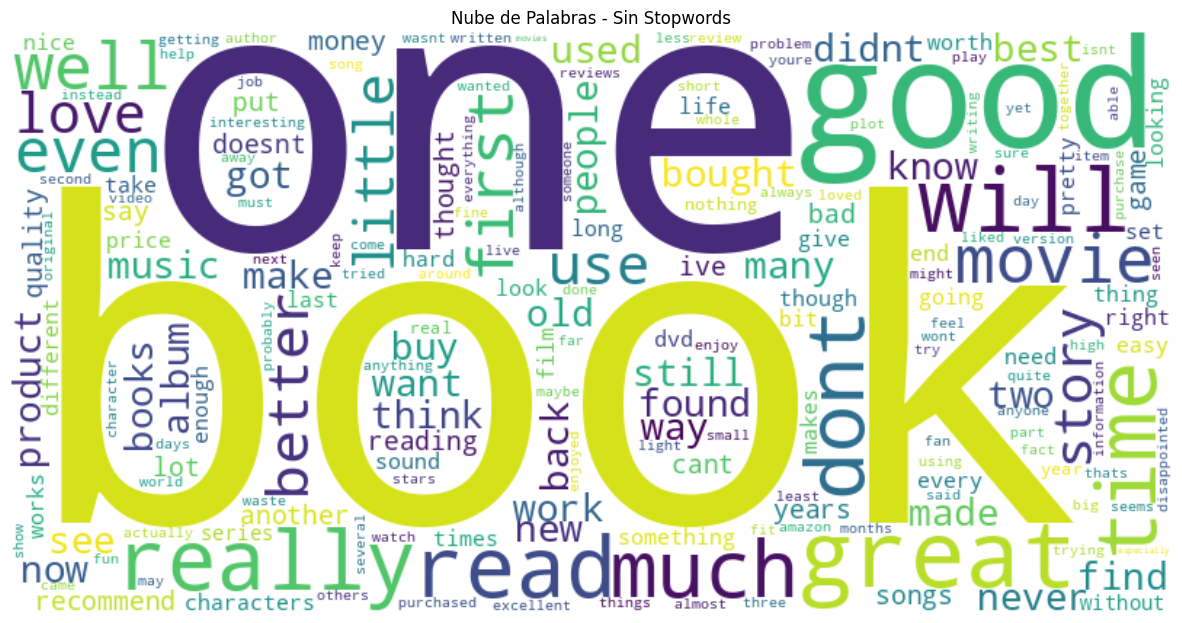

In [26]:

token_re = re.compile(r'\b\w+\b', flags=re.UNICODE)

def tokenize(text):
    return token_re.findall(text.lower())

# Creamos el contador
counter_limpio = Counter()

for review in df['clean_review'].dropna():
    tokens = tokenize(review)

    tokens = [t for t in tokens if t not in STOPWORDS and len(t) > 2]

    counter_limpio.update(tokens)

wordcloud_limpio = WordCloud(
    background_color="white",
    width=800, height=400,
    max_words=200
).generate_from_frequencies(counter_limpio)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud_limpio, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Sin Stopwords")
plt.show()


In [27]:
df.head()

,rating,clean_title,clean_review
0,3,more like funchuck,gave this to my dad for a gag gift after direc...
1,5,inspiring,i hope a lot of people hear this cd we need mo...
2,5,the best soundtrack ever to anything,im reading a lot of reviews saying that this i...
3,4,chrono cross ost,the music of yasunori misuda is without questi...
4,5,too good to be true,probably the greatest soundtrack in history us...


In [28]:
df.to_parquet(
    "/content/drive/MyDrive/00. Universidad/02. Analisis de Datos/evento evaluativo 4/amazon_review_clean_v2.parquet",
    engine="pyarrow",
    compression="snappy",
    index=False
)